In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [174]:
le = LabelEncoder()

In [175]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/titanic_dataset.csv")

In [176]:
df = data.copy()

In [177]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
df.shape

(891, 12)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

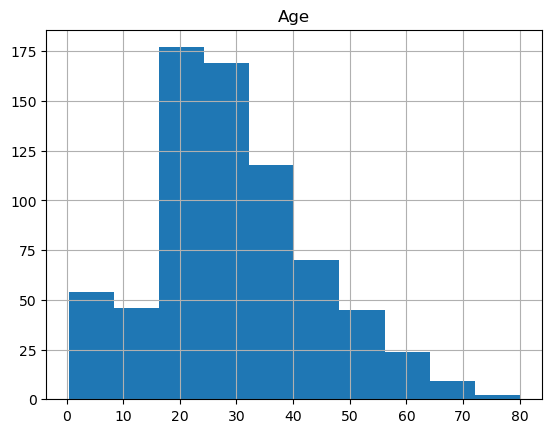

In [181]:
df["Age"].hist()
plt.title("Age")
plt.show()

## Null value Handling

In [182]:
c1 = ["Cabin","Embarked"]
df["Age"] = df["Age"].fillna(df["Age"].median())
for i in c1:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Outlier Removal

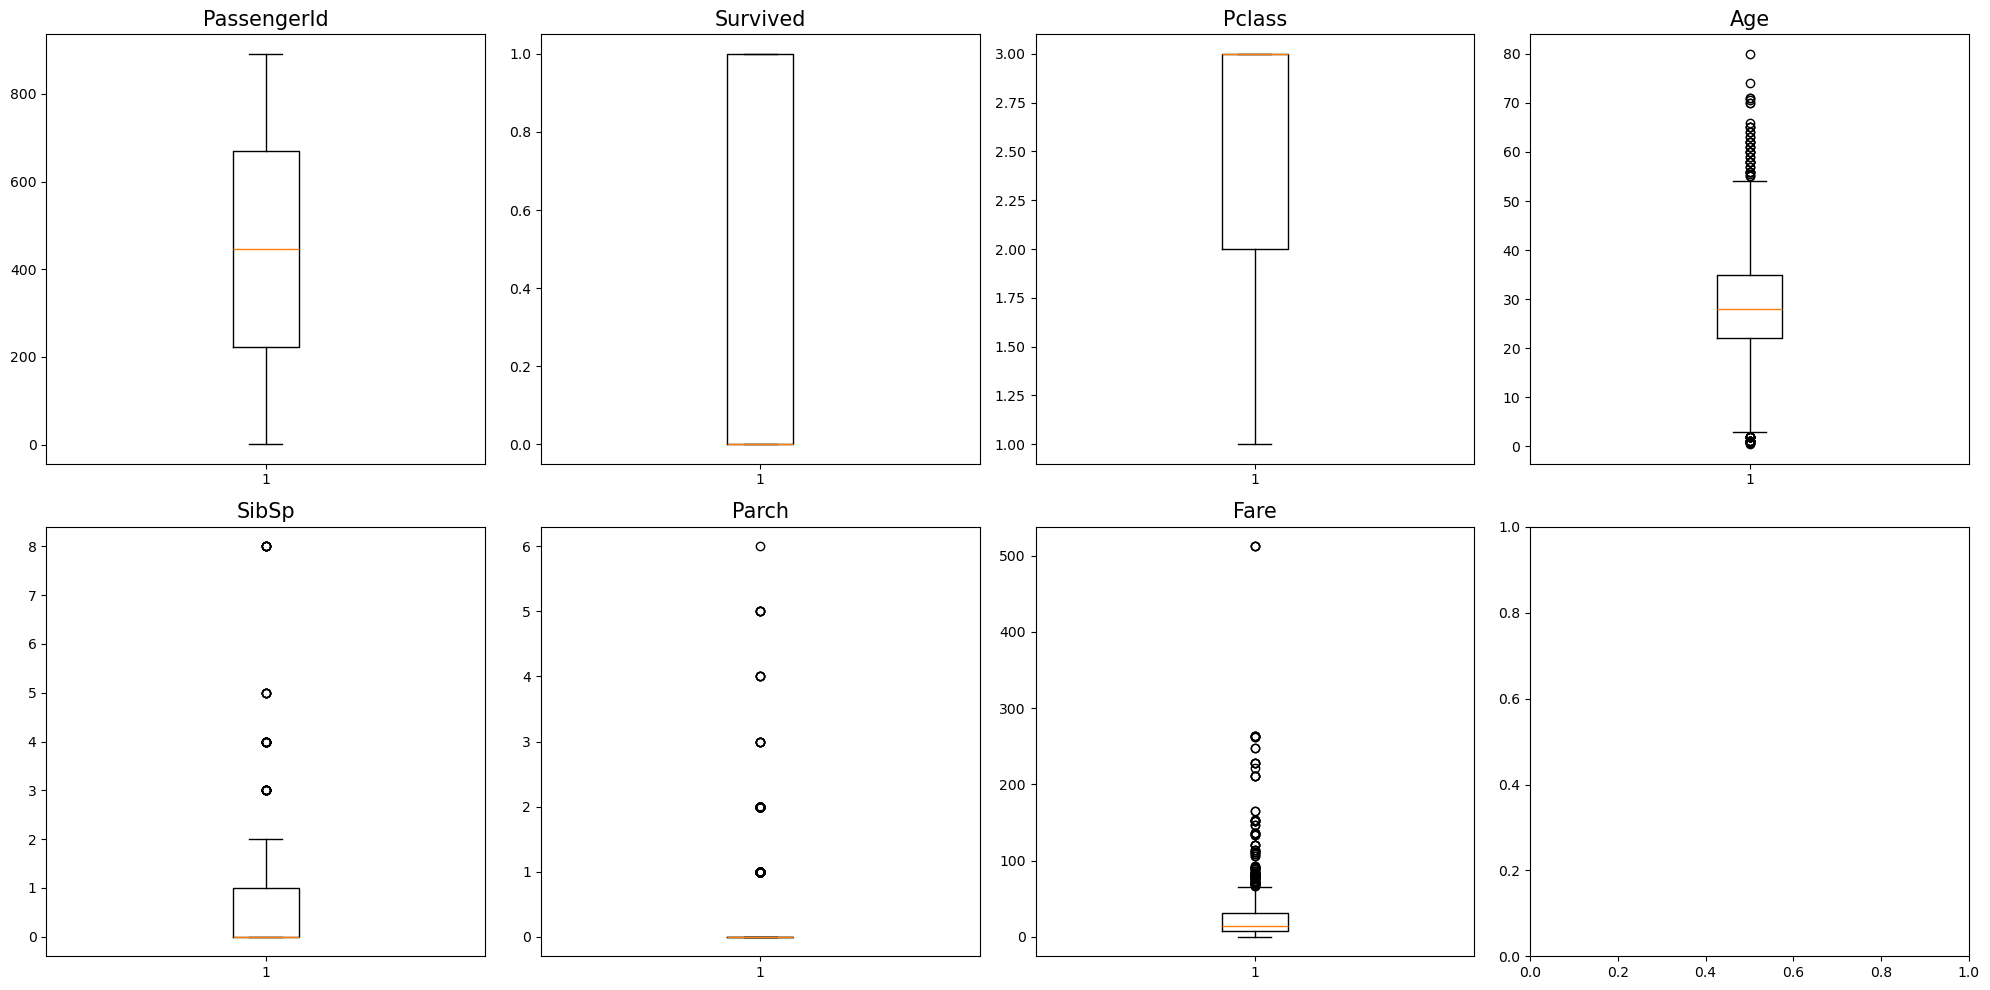

In [183]:
col1 = df.select_dtypes(["int","float"])
fig,axs = plt.subplots(2,4, figsize = (20,10))
axs = axs.flatten()
for i in range(7):
    axs[i].boxplot(df[col1.columns[i]])
    axs[i].set_title(col1.columns[i],fontsize = 15)
plt.tight_layout()
plt.show()

In [184]:
def outliers(df,col):
    Q1 = np.percentile(df[col],25,method = "midpoint")
    Q3 = np.percentile(df[col],75,method = "midpoint")
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outlier = df[(df[col] > upper) | (df[col] < lower)]
    list1 = outlier[col].tolist()
    return upper , lower , outlier , list1

### Age Column

In [185]:
upper,lower,outlier,list1 = outliers(df,"Age")
print(f"upper={upper},lower={lower}, list1{list1}")
outlier.head()

upper=54.5,lower=2.5, list1[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,B96 B98,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,B96 B98,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,B96 B98,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,B96 B98,S


In [186]:
df = df[(df["Age"] >= lower) & (df["Age"] <= upper)] # removes the out lier 

In [187]:
outlier = df[(df["Age"] > upper)|(df["Age"]<lower)]["Age"].tolist()
outlier

[]

### SibSp Column

In [188]:
upper,lower,outlier,list1 = outliers(df,"SibSp")
print(f"upper={upper},lower={lower},list1={list1}")
outlier.head()

upper=2.5,lower=-1.5,list1=[3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,B96 B98,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,B96 B98,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,B96 B98,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,B96 B98,S


In [189]:
df = df[(df["SibSp"] >= lower)&(df["SibSp"] <= upper)]

In [190]:
outlier = df[(df["SibSp"] > upper)|(df["SibSp"] < lower)]["SibSp"].tolist()
outlier

[]

### Parch Column

In [191]:
upper,lower,outlier,list1 = outliers(df,"Parch")
print(f"upper={upper},lower={lower},list1={list1}")
outlier.head()

upper=0.0,lower=0.0,list1=[2, 1, 5, 5, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 2]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,B96 B98,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,B96 B98,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,B96 B98,C


In [192]:
df = df[(df["Parch"] >= lower) & (df["Parch"] <= upper)]

In [193]:
outlier = df[(df["Parch"] > upper)|(df["Parch"]<lower)]["Parch"].tolist()
outlier

[]

### Fare column

In [194]:
upper,lower,outlier,list1 = outliers(df,"Fare")
print(f"upper={upper},lower={lower}, list1={list1}")
outlier.head()

upper=53.2187,lower=-19.364500000000003, list1=[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 56.4958, 61.175, 73.5, 79.2, 66.6, 56.4958, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 135.6333, 78.85, 91.0792, 110.8833, 108.9, 56.9292, 83.1583, 135.6333, 133.65, 66.6, 134.5, 69.3, 55.4417, 135.6333, 82.1708, 227.525, 73.5, 113.275, 90.0, 55.9, 89.1042, 91.0792, 90.0, 78.2667, 86.5, 108.9, 56.4958, 59.4, 93.5, 221.7792, 106.425, 106.425, 227.525, 55.9, 78.2667, 56.9292, 153.4625, 77.9583, 69.3, 56.4958, 76.7292, 73.5, 133.65, 73.5, 76.7292, 57.0, 56.4958, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 86.5, 77.9583, 57.0, 79.2, 56.4958, 56.4958, 89.1042]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,B96 B98,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S


In [195]:
df = df[(df["Fare"] >= lower)&(df["Fare"]<=upper)]

In [196]:
outlier = df[(df["Fare"] > upper)|(df["Fare"]<lower)]["Fare"].tolist()
outlier

[]

In [197]:
df.reset_index(drop = True, inplace = True)

In [198]:
df1 = df.copy()

In [199]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [200]:
obj = df1.select_dtypes("object")
obj.nunique()

Name        561
Sex           2
Ticket      520
Cabin        56
Embarked      3
dtype: int64

In [201]:
df1.drop(["Name","Ticket"], axis = 1 , inplace = True)

In [202]:
obj = df1.select_dtypes("object")
obj.nunique()

Sex          2
Cabin       56
Embarked     3
dtype: int64

In [203]:
onehot = pd.get_dummies(obj, drop_first = True,dtype = int)

In [204]:
df1 = df1.drop(columns = obj.columns)

In [205]:
df1 = pd.concat([df1,onehot],axis = 1)

In [206]:
df1.reset_index(drop = True, inplace = True)

In [207]:
df1.to_csv("onehotEncoded.csv",index = False)

In [208]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_E58,Cabin_E63,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F33,Cabin_F38,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,0,3,28.0,0,0,8.4583,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Labeled Encoding

In [209]:
df2 = df.copy()

In [210]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [211]:
obj2 = df2.select_dtypes("object")
obj.head()

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,B96 B98,S
2,female,C123,S
3,male,B96 B98,S
4,male,B96 B98,Q


In [212]:
obj2.nunique()

Name        561
Sex           2
Ticket      520
Cabin        56
Embarked      3
dtype: int64

In [213]:
df2.drop(["Name","Ticket"],axis = 1, inplace = True)

In [214]:
obj2 = df2.select_dtypes("object")

In [215]:
for i in obj2.columns:
    df2[i] = le.fit_transform(df2[i])

In [216]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,17,2
1,3,1,3,0,26.0,0,0,7.9250,17,2
2,4,1,1,0,35.0,1,0,53.1000,23,2
3,5,0,3,1,35.0,0,0,8.0500,17,2
4,6,0,3,1,28.0,0,0,8.4583,17,1
...,...,...,...,...,...,...,...,...,...,...
556,885,0,3,1,25.0,0,0,7.0500,17,2
557,887,0,2,1,27.0,0,0,13.0000,17,2
558,888,1,1,0,19.0,0,0,30.0000,12,2
559,890,1,1,1,26.0,0,0,30.0000,27,0


In [217]:
df3 = df.copy()

In [219]:
df3["Sex"] = le.fit_transform(df["Sex"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S
4,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
556,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,S
557,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,B96 B98,S
558,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
559,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C
